In [61]:
from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
#Rossler System

In [63]:
def next_rossler(x0, y0, z0, dt):
    a=b=0.2
    c=5.7
    dxdt = -y0-z0
    dydt = x0+a*y0
    dzdt = b+z0*(x0-c)
    dx=dxdt*dt
    dy=dydt*dt
    dz=dzdt*dt
    x=x0+dx
    y=y0+dy
    z=z0+dz
    return x, y, z
    #print'x,y,z = %s.' % x,y,z

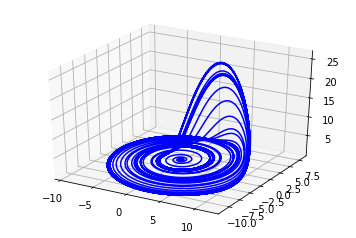

In [328]:
ros1 = []
ros2 = []
ros3 = []
x=0
y=0
z=0
for i in range(30000):
    x1,y1,z1=next_rossler(x,y,z,0.01)
    #print'%s.' %x1,y1,z1
    x=x1
    y=y1
    z=z1
    ros1.append(x)
    ros2.append(y)
    ros3.append(z)
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
ax = plt.axes(projection='3d')
#plt.plot(out2,out3)
ax.plot3D(ros1, ros2, ros3, 'b')

In [65]:
#Lorenz system

In [66]:
def next_lorenz(x0, y0, z0, dt):
    sig=10
    b=8/3
    r=28
    dxdt = sig*(y0 - x0)
    dydt = r*x0 -y0- x0*z0
    dzdt = x0*y0-b*z0
    dx=dxdt*dt
    dy=dydt*dt
    dz=dzdt*dt
    x=x0+dx
    y=y0+dy
    z=z0+dz
    return x, y, z

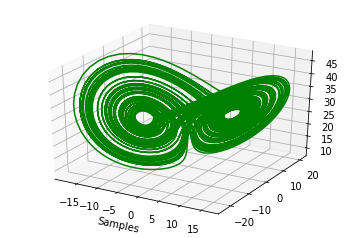

In [329]:
lor1 = []
lor2 = []
lor3 = []
x=15
y=20 
z=30
for i in range(10000):
    x1,y1,z1=next_lorenz(x,y,z,0.01)
    #print'%s.' %x1,y1,z1
    x=x1
    y=y1
    z=z1
    lor1.append(x)
    lor2.append(y)
    lor3.append(z)
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
#plt.subplot(311)
ax = plt.axes(projection='3d')
#plt.plot(out1,'mediumblue')

#plt.subplot(312)
#plt.plot(out2,'mediumblue')

#plt.subplot(313)
#plt.plot(out3,'mediumblue')
plt.xlabel('Samples')
ax.plot3D(lor1, lor2, lor3, 'g')

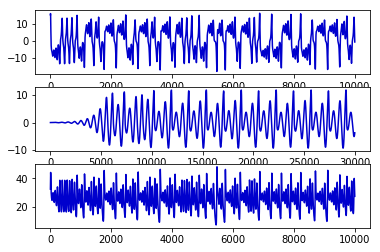

In [330]:
plt.subplot(311)
plt.plot(lor1,'mediumblue')

plt.subplot(312)
plt.plot(ros1,'mediumblue')

plt.subplot(313)
plt.plot(lor3,'mediumblue')

In [69]:
# feature extraction method Lorenz's sysytem

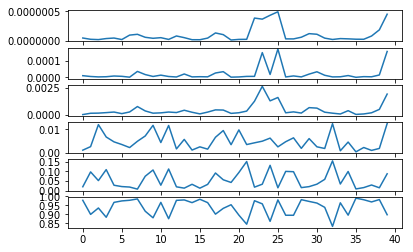

In [287]:
# feature extraction method
en, Num, e1, e2, e3, e4, e5, e6 = 0, 250, [], [], [], [], [], []
for st in range(0, 10000, Num):
    en = en + Num
    #Time domain feature extraction
    x1 = lor1[st:en]
    from pywt import wavedec
    coeffs = wavedec(np.asarray(x1), 'db4', level=5)
    [cA5, cD5, cD4, cD3 ,cD2, cD1] = coeffs
    #cD1
    eD1 = sum(x*x for x in cD1)
    eD2 = sum(x*x for x in cD2)
    eD3 = sum(x*x for x in cD3)
    eD4 = sum(x*x for x in cD4)
    eD5 = sum(x*x for x in cD5)
    eA5 = sum(x*x for x in cA5)
    #print "eD1=",eD1, "\neD2=",eD2,"\neD3=",eD3, "\neD4=",eD4, "\neD5=",eD5, "\neA5=",eA5
    
    eT = eD1+eD2+eD3+eD4+eD5+eA5
    #print "\neT=",eT,"\n"
    eR1 = eD1/eT
    e1.append(eR1)
    eR2 = eD2/eT
    e2.append(eR2)
    eR3 = eD3/eT
    e3.append(eR3)
    eR4 = eD4/eT
    e4.append(eR4)
    eR5 = eD5/eT
    e5.append(eR5)
    eRA5 = eA5/eT
    e6.append(eRA5)
    #print "eR1=",eR1, "\neR2=",eR2,"\neR3=",eR3,"\neR4=",eR4, "\neR5=",eR5, "\neRA5=",eRA5,"\n"

plt.subplot(611)
plt.plot(e1)
plt.subplot(612)
plt.plot(e2)
plt.subplot(613)
plt.plot(e3)
plt.subplot(614)
plt.plot(e4)
plt.subplot(615)
plt.plot(e5)
plt.subplot(616)
plt.plot(e6)

In [71]:
# feature extraction method Rossler's sysytem

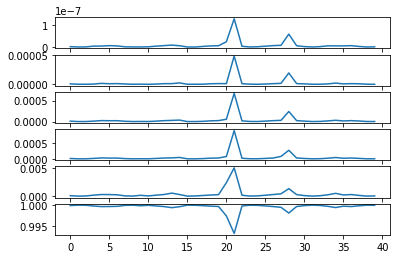

In [288]:
en, Num, f1, f2, f3, f4, f5, f6 = 5000, 250, [], [], [], [], [], []
for st in range(5000, 15000, Num):
    en = en + Num
    #Time domain feature extraction
    x1 = ros1[st:en]
    from pywt import wavedec
    coeffs = wavedec(np.asarray(x1), 'db4', level=5)
    [cA5, cD5, cD4, cD3 ,cD2, cD1] = coeffs
    #cD1
    eD1 = sum(x*x for x in cD1)
    eD2 = sum(x*x for x in cD2)
    eD3 = sum(x*x for x in cD3)
    eD4 = sum(x*x for x in cD4)
    eD5 = sum(x*x for x in cD5)
    eA5 = sum(x*x for x in cA5)
    #print "eD1=",eD1, "\neD2=",eD2,"\neD3=",eD3, "\neD4=",eD4, "\neD5=",eD5, "\neA5=",eA5
    
    eT = eD1+eD2+eD3+eD4+eD5+eA5
    #print "\neT=",eT,"\n"
    eR1 = eD1/eT
    f1.append(eR1)
    eR2 = eD2/eT
    f2.append(eR2)
    eR3 = eD3/eT
    f3.append(eR3)
    eR4 = eD4/eT
    f4.append(eR4)
    eR5 = eD5/eT
    f5.append(eR5)
    eRA5 = eA5/eT
    f6.append(eRA5)
    #print "eR1=",eR1, "\neR2=",eR2,"\neR3=",eR3,"\neR4=",eR4, "\neR5=",eR5, "\neRA5=",eRA5,"\n"
    
plt.subplot(611)
plt.plot(f1)
plt.subplot(612)
plt.plot(f2)
plt.subplot(613)
plt.plot(f3)
plt.subplot(614)
plt.plot(f4)
plt.subplot(615)
plt.plot(f5)
plt.subplot(616)
plt.plot(f6)


In [73]:
# normalize data Lorenz' ssystem

In [289]:
e11, e22, e33, e44, e55, e66 = [], [], [], [], [], []
m = np.mean(e1)
v = np.std(e1)
for i in e1:
    it1 = (i-m)/v
    e11.append(it1)
m = np.mean(e2)
v = np.std(e2)
for i in e2:
    it2 = (i-m)/v
    e22.append(it2)
m = np.mean(e3)
v = np.std(e3)
for i in e3:
    it3 = (i-m)/v
    e33.append(it3)
m = np.mean(e4)
v = np.std(e4)
for i in e4:
    it4 = (i-m)/v
    e44.append(it4)
m = np.mean(e5)
v = np.std(e5)
for i in e5:
    it5 = (i-m)/v
    e55.append(it5)
m = np.mean(e6)
v = np.std(e6)
for i in e6:
    it6 = (i-m)/v
    e66.append(it6)

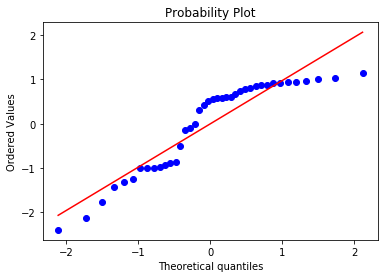

In [295]:
# normalization plots
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(e66, plot=plt)

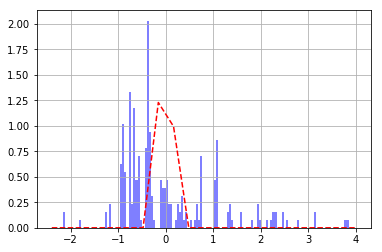

In [296]:
# histogram plots
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
mu = 0 # mean of distribution
sigma = 0.1 # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist([e11, e22, e33, e44, e55, e66], num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.grid()
plt.show()

In [77]:
# normalize rossler's data

In [297]:
f11, f22, f33, f44, f55, f66 = [], [], [], [], [], []
m = np.mean(f1)
v = np.std(f1)
for i in f1:
    it1 = (i-m)/v
    f11.append(it1)
m = np.mean(f2)
v = np.std(f2)
for i in f2:
    it2 = (i-m)/v
    f22.append(it2)
m = np.mean(f3)
v = np.std(f3)
for i in f3:
    it3 = (i-m)/v
    f33.append(it3)
m = np.mean(f4)
v = np.std(f4)
for i in f4:
    it4 = (i-m)/v
    f44.append(it4)
m = np.mean(f5)
v = np.std(f5)
for i in f5:
    it5 = (i-m)/v
    f55.append(it5)
m = np.mean(f6)
v = np.std(f6)
for i in f6:
    it6 = (i-m)/v
    f66.append(it6)

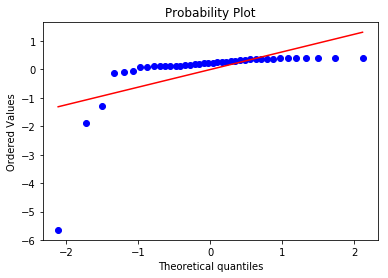

In [298]:
# normalization plots
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(f66, plot=plt)

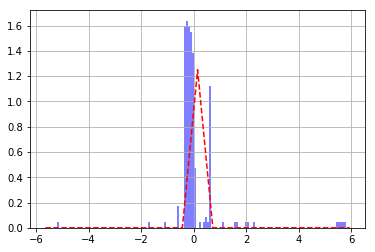

In [299]:
# histogram plots
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
mu = 0 # mean of distribution
sigma = 0.1 # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist([f11, f22, f33, f44, f55, f66], num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.grid()
plt.show()

In [300]:
e_d = np.transpose([e11, e22, e33, e44, e55, e66])
#tar = np.insert(e_d, 04, values=1, axis=1)
tar = np.ones((40,1))

In [301]:
f_d = np.transpose([f11, f22, f33, f44, f55, f66])
#tar1 = np.insert(f_d, 40, values=0, axis=1)
tar1 = np.zeros((40,1))

In [302]:
final=np.concatenate((e_d, f_d), axis=0)
target=np.concatenate((tar, tar1), axis=0)
import pandas as pd 
df = pd.DataFrame(final)
df.to_csv("dat", index=False)

In [303]:
data = pd.read_csv("../Python/dat")
data

,0,1,2,3,4,5
0,-0.416527,-0.267147,-0.777827,-1.074990,-0.815974,0.870444
1,-0.585517,-0.387100,-0.556082,-0.645444,0.999295,-0.892885
2,-0.625930,-0.449048,-0.533358,2.034929,-0.062760,-0.093268
3,-0.488650,-0.423312,-0.449096,0.529687,1.278830,-1.252414
4,-0.421250,-0.316130,-0.352101,-0.064350,-0.632179,0.611058
5,-0.618641,-0.361939,-0.619201,-0.386911,-0.793732,0.793384
6,-0.035149,-0.489769,-0.337976,-0.758461,-0.851500,0.874227
7,0.070172,0.370290,0.580460,0.005384,-1.104266,1.042755
8,-0.323122,-0.100309,-0.162558,0.653125,0.469769,-0.496168
9,-0.453614,-0.382475,-0.542085,1.949365,1.233292,-1.319526


In [304]:
# Dataset preparation for classification

In [305]:
from sklearn.model_selection import train_test_split

X = np.asarray(data[['0', '1', '2', '3', '4', '5']])
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [306]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
#Classifiers

In [307]:
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


In [308]:
# Predicting the Test set results
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

In [309]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  1]
 [ 0  8]]


In [310]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 95.000000
Sensitivity :91.666667
Specificity :100.000000
Precision :57.894737


In [314]:
# 2. KNN classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [315]:
from sklearn.metrics import classification_report, confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)  
#print(classification_report(y_test, y_pred))  

[[11  1]
 [ 1  7]]


In [316]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 90.000000
Sensitivity :91.666667
Specificity :87.500000
Precision :61.111111


In [317]:
# 3. Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on test set: 0.85


In [318]:
# Predicting the Test set results
y_pred = svm.predict(X_test)
y_pred = (y_pred > 0.5)

In [319]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  1]
 [ 2  6]]


In [320]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 85.000000
Sensitivity :91.666667
Specificity :75.000000
Precision :64.705882


In [39]:
# 4. MLP classifier

In [321]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
#classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=6, units=20)`
  
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


In [322]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 1, nb_epoch = 100)

Epoch 1/100
60/60 [==============================] - 1s 15ms/step - loss: 0.6931 - acc: 0.4333
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6908 - acc: 0.5333
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6868 - acc: 0.5333
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6813 - acc: 0.5333
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6713 - acc: 0.5333
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6607 - acc: 0.5333
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6472 - acc: 0.5333
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6346 - acc: 0.5333
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6230 - acc: 0.5333
Epoch 10/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6113 - acc: 0.5667
Epoch 11/100
60/60 [==============================] - 0s 2

In [323]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [324]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  1]
 [ 0  8]]


In [325]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 95.000000
Sensitivity :91.666667
Specificity :100.000000
Precision :57.894737


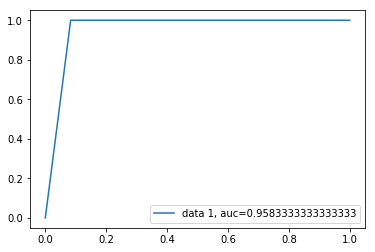

In [326]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()